In [1]:
import gensim.downloader as api
wv = api.load("word2vec-google-news-300")

In [2]:
wv.similarity(w1="hi", w2="hello")

0.6548984

In [2]:
# King - man + woman = Queen

wv.most_similar(positive = ['king', 'woman'], negative =['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

In [12]:
import pandas as pd 
import numpy as np 
import spacy
nlp = spacy.load("en_core_web_lg")

df = pd.read_csv("fake_news_data.csv")
print("Dataframe shape:", df.shape, "\n")

# No class imbalances to worry about
print(df.label.value_counts())

# Creating a numeric column for the label
df["label_num"] = df.label.map({"Fake":0, "Real":1})

df.head()

Dataframe shape: (9900, 2) 

label
Fake    5000
Real    4900
Name: count, dtype: int64


,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [14]:
# Preprocessing of Text
# And Converting Text into Gensim Word Embeddings 

def preprocess_text_and_vectorize(text):
    doc = nlp(text)

    filtered_tokens = []
    for token in doc:
        # Removing stop words and punctuation 
        if token.is_stop or token.is_punct:
            continue
        # taking the lemma token 
        filtered_tokens.append(token.lemma_)
    
    return wv.get_mean_vector(filtered_tokens)

df['vector'] = df['Text'].apply(lambda x: preprocess_text_and_vectorize(x))

In [15]:
# Creating Test and Training Datasets 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size = 0.2,
    random_state = 1234,
    stratify=df.label_num
)

# Reshaping the X_train and X_test datasets    
X_train_2D = np.stack(X_train)
X_test_2D = np.stack(X_test)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()

clf.fit(X_train_2D, y_train)

y_pred = clf.predict(X_test_2D)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(83.22222222222221, 0.5, 'Truth')

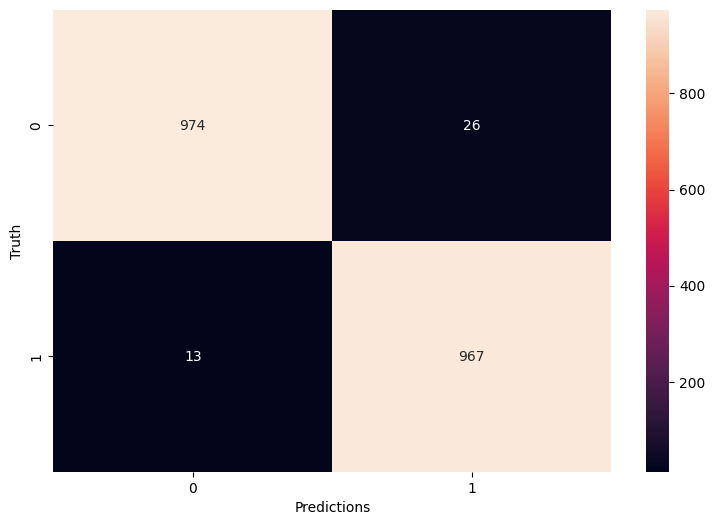

In [23]:
# Creating Confusion Matrix Diagram to help visualize output

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt 
import seaborn as sn
plt.figure(figsize = (9,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")